### 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
lfw_people = fetch_lfw_people()

In [4]:
# lfw_people = fetch_lfw_people(data_home='~/data/')

In [5]:
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [6]:
x = lfw_people.data
y = lfw_people.target

In [7]:
x.shape, y.shape

((13233, 2914), (13233,))

In [8]:
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(13233, 62, 47)

In [9]:
y[:10]

array([5360, 3434, 3807,   26, 3957,  439, 2683, 3734, 5465, 3445])

In [10]:
lfw_people.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [11]:
lfw_people.target_names.shape

(5749,)

In [12]:
def plot_faces(data, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(data[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.show()

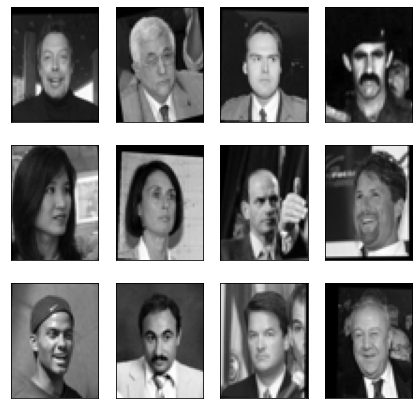

In [13]:
plot_faces(x, h, w)

### 数据集处理

In [14]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [15]:
x = lfw_people.data
y = lfw_people.target

In [16]:
x.shape, y.shape

((1288, 1850), (1288,))

In [17]:
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

In [18]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [19]:
lfw_people.target_names.shape

(7,)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train.shape, x_test.shape

((966, 1850), (322, 1850))

### PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, random_state=42)

In [25]:
pca.fit(x_train)

PCA(n_components=150, random_state=42)

In [26]:
pca.components_.shape

(150, 1850)

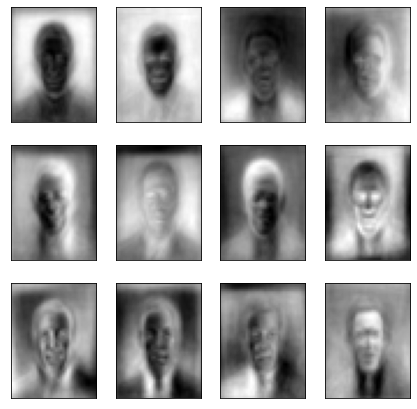

In [27]:
plot_faces(pca.components_, h, w)

In [28]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### 人脸识别

In [29]:
from sklearn.svm import SVC

In [30]:
clf = SVC(C = 10)
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)

0.8198757763975155

In [31]:
clf = SVC(C = 10)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8136645962732919